In [1]:
import pandas as pd
df = pd.read_excel(open('/Users/ymzhang/Desktop/city_pressure.xlsx','rb'), sheetname='sheet1')

In [2]:
df.rename(columns={'full_name':'city'}, inplace=True)

In [3]:
df.completion_rate=round(df.completion_rate,2)
df.pressure_ratio=round(df.pressure_ratio,2)
df.time_cost=round(df.time_cost,0)
df.overtime_rate=round(df.overtime_rate,2)
df.overtime_rate_40=round(df.overtime_rate_40,2)
df.cancel_rate=round(df.cancel_rate,2)

In [4]:
df.columns

Index(['order_date', 'city', 'grid_id', 'grid_name', 'pressure_ratio',
       'pressure_load', 'completion_rate', 'overtime_rate', 'overtime_rate_40',
       'cancel_rate', 'tracking_order_cnt', 'completion_cnt', 'time_cost',
       'overtime_cnt', 'overtime_cnt_40', 'cancel_order_cnt', 'fraud_cnt',
       'eleme_order_cnt'],
      dtype='object')

In [5]:
names=['order_date','city','grid_id','pressure_ratio','pressure_load','time_cost','completion_rate','overtime_rate','overtime_rate_40','cancel_rate']
names1=['pressure_ratio','pressure_load','time_cost','completion_rate','overtime_rate','overtime_rate_40','cancel_rate']

In [6]:
df1=df[names]
df2=df[names1]

In [7]:
df3=df1.dropna()

In [9]:
from sklearn.ensemble import IsolationForest
import numpy as np
rng = np.random.RandomState(42)
clf=IsolationForest(max_samples=100,random_state=rng)
clf.fit(df3[names1])
df1_pred=clf.predict(df3[names1])
pred=pd.Series(df1_pred) 

In [10]:
pred.value_counts()

 1    61378
-1     6820
dtype: int64

In [11]:
index = [i for i,x in enumerate(pred) if x == 1]
df4=df3.ix[index]

In [13]:
df2.describe()

,pressure_ratio,pressure_load,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
count,68198.000000,68370.000000,68385.000000,68421.000000,68385.000000,68385.000000,68421.000000
mean,0.300956,89.975174,33.365855,0.960072,0.030924,0.258061,0.001843
std,0.165614,76.702257,6.173559,0.070835,0.052305,0.169192,0.007373
min,0.000000,0.000000,12.000000,-0.330000,0.000000,0.000000,0.000000
25%,0.200000,38.000000,29.000000,0.960000,0.000000,0.120000,0.000000
50%,0.280000,70.146963,33.000000,0.980000,0.010000,0.230000,0.000000
75%,0.370000,120.043135,37.000000,0.990000,0.040000,0.360000,0.000000
max,9.590000,959.129032,163.000000,1.000000,1.000000,1.000000,0.440000


In [94]:
df5=df4.ix[((df4.pressure_ratio<1.5)&(df4.pressure_ratio>0.1)&(df4.overtime_rate<=0.5)&(df4.cancel_rate<=0.2)) ,]

In [65]:
df5.columns

Index(['order_date', 'city', 'grid_id', 'pressure_ratio', 'pressure_load',
       'time_cost', 'completion_rate', 'overtime_rate', 'overtime_rate_40',
       'cancel_rate'],
      dtype='object')

In [101]:
df5[names1].describe()

,pressure_ratio,pressure_load,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
count,56970.000000,56970.000000,56970.000000,56970.000000,56970.000000,56970.000000,56970.000000
mean,0.314862,94.851299,33.155169,0.963948,0.027183,0.252962,0.001662
std,0.140551,75.478331,5.955210,0.058837,0.044132,0.165854,0.006417
min,0.110000,1.000000,12.000000,-0.330000,0.000000,0.000000,0.000000
25%,0.220000,43.681265,29.000000,0.960000,0.000000,0.120000,0.000000
50%,0.280000,74.492068,32.000000,0.980000,0.010000,0.220000,0.000000
75%,0.380000,124.511129,36.000000,0.990000,0.030000,0.350000,0.000000
max,1.440000,959.129032,82.000000,1.000000,0.500000,1.000000,0.180000


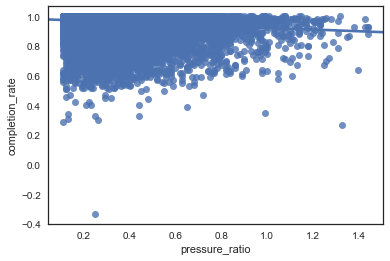

In [67]:
import seaborn as sns
%matplotlib inline
sns.regplot(x="pressure_ratio",y="completion_rate",data=df5)

In [74]:
df5_beijing=df5.ix[(df5.city=='北京市'),]

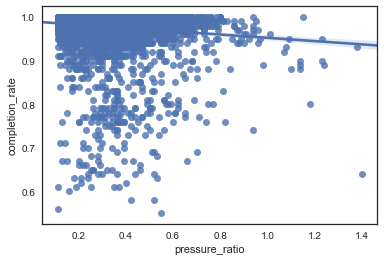

In [69]:
sns.regplot(x="pressure_ratio",y="completion_rate",data=df5_beijing)

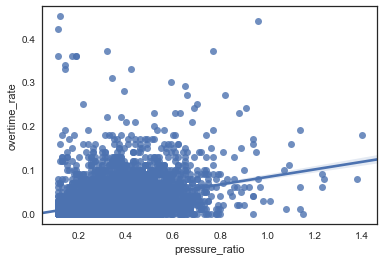

In [75]:
sns.regplot(x="pressure_ratio",y="overtime_rate",data=df5_beijing)

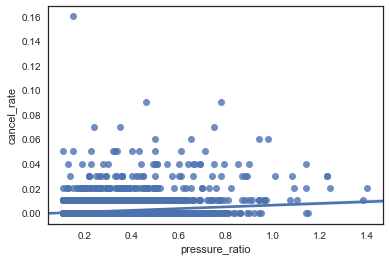

In [76]:
sns.regplot(x="pressure_ratio",y="cancel_rate",data=df5_beijing)

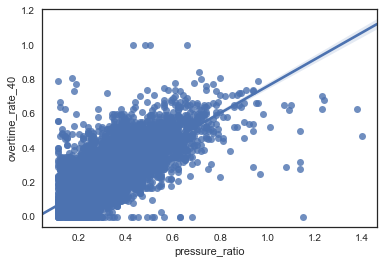

In [77]:
sns.regplot(x="pressure_ratio",y="overtime_rate_40",data=df5_beijing)

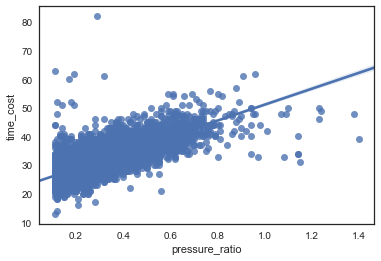

In [78]:
sns.regplot(x="pressure_ratio",y="time_cost",data=df5_beijing)

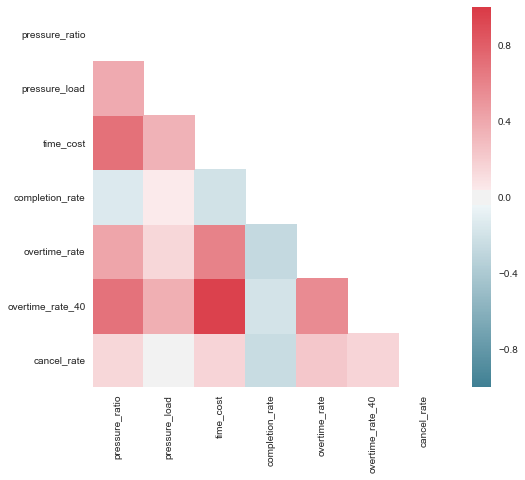

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Generate a large random dataset
d = pd.DataFrame(data=df5,columns=names1)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [103]:
corr

,pressure_ratio,pressure_load,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
pressure_ratio,1.000000,0.388486,0.695659,-0.139465,0.421516,0.695139,0.142852
pressure_load,0.388486,1.000000,0.347975,0.046071,0.144265,0.362167,0.004530
time_cost,0.695659,0.347975,1.000000,-0.199449,0.606846,0.957323,0.163343
completion_rate,-0.139465,0.046071,-0.199449,1.000000,-0.266918,-0.191502,-0.249248
overtime_rate,0.421516,0.144265,0.606846,-0.266918,1.000000,0.561087,0.234174
overtime_rate_40,0.695139,0.362167,0.957323,-0.191502,0.561087,1.000000,0.160365
cancel_rate,0.142852,0.004530,0.163343,-0.249248,0.234174,0.160365,1.000000


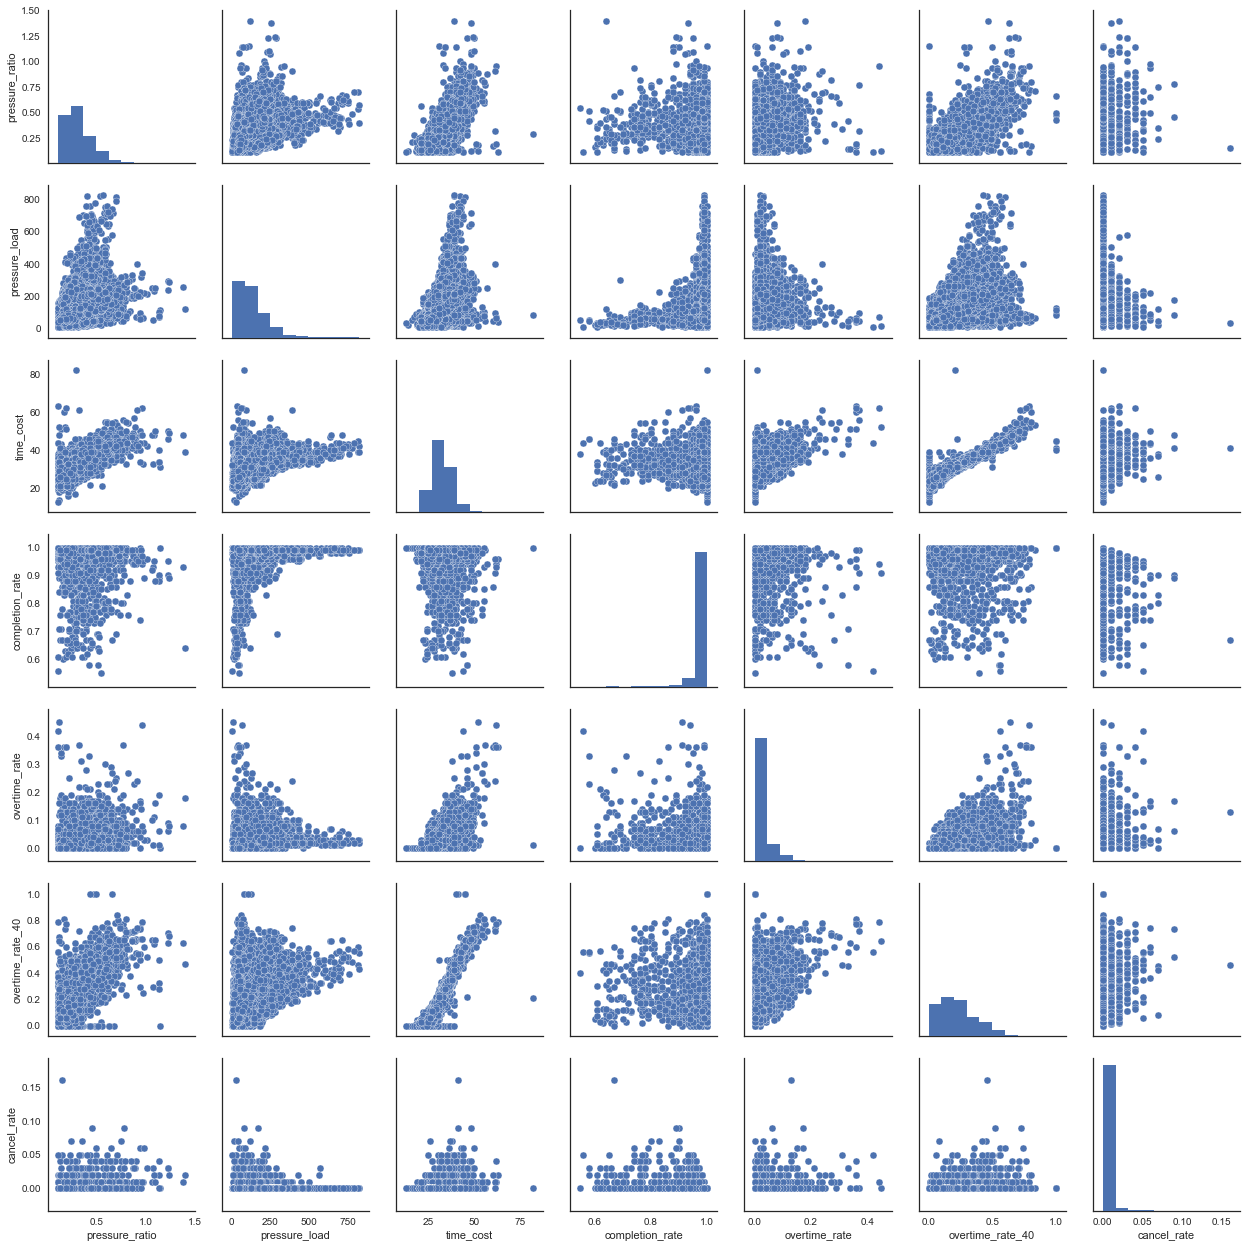

In [81]:
sns.pairplot(df5_beijing[names1])

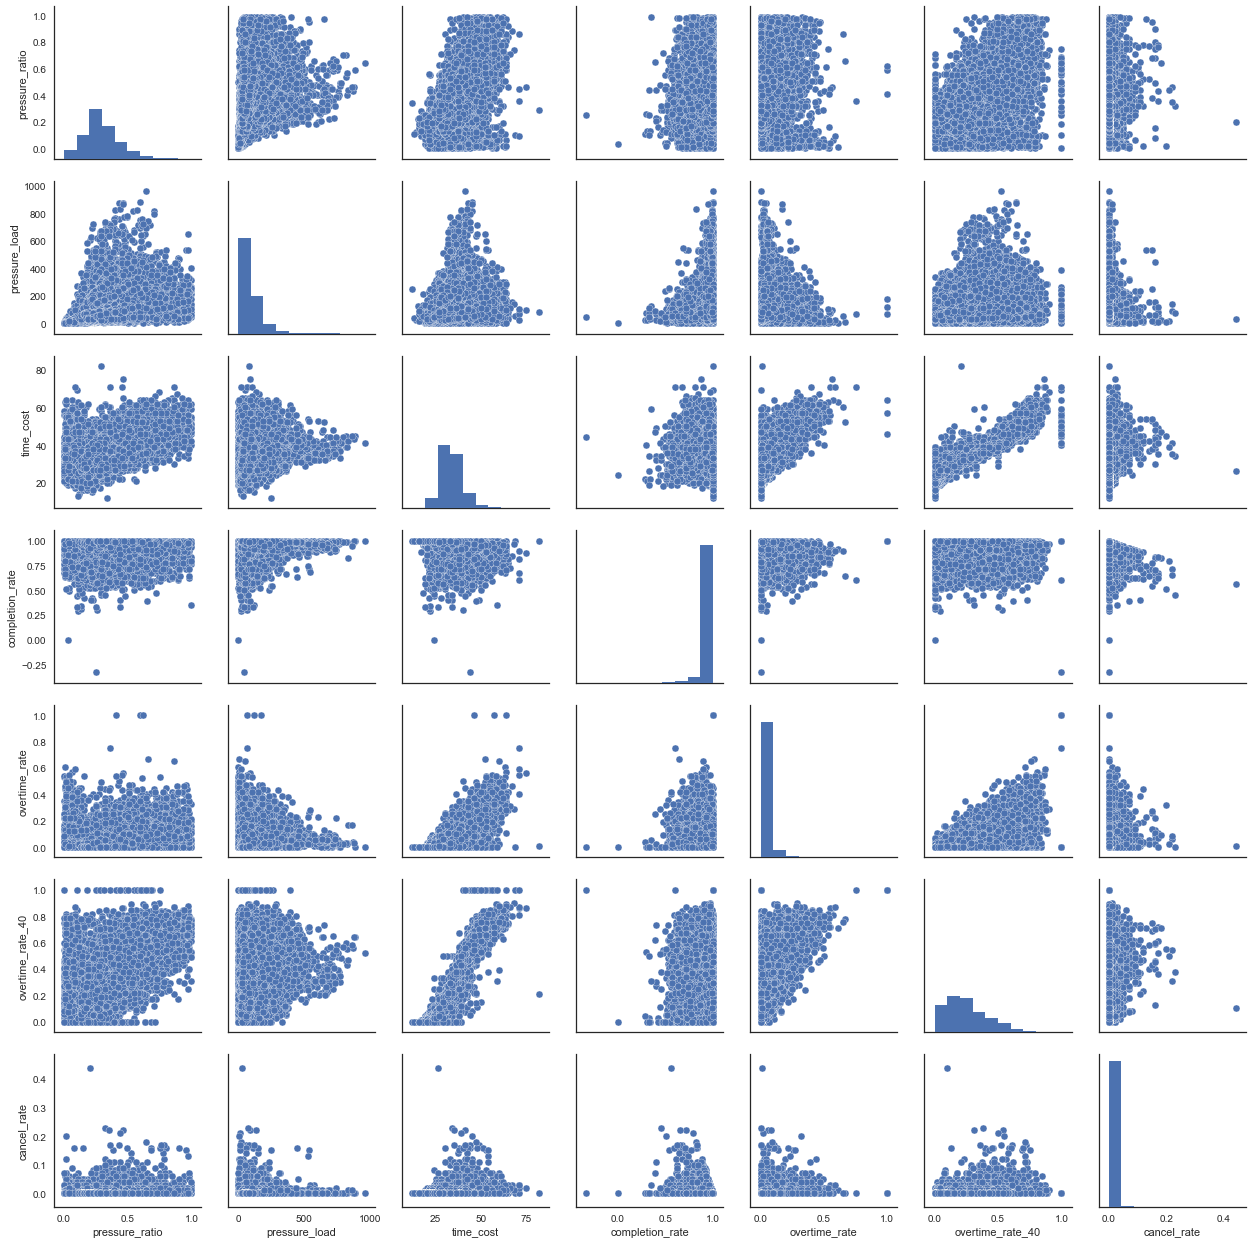

In [27]:
sns.pairplot(df5[names1])

In [28]:
df5_zhengzhou=df5.ix[(df5.city=='郑州市'),]

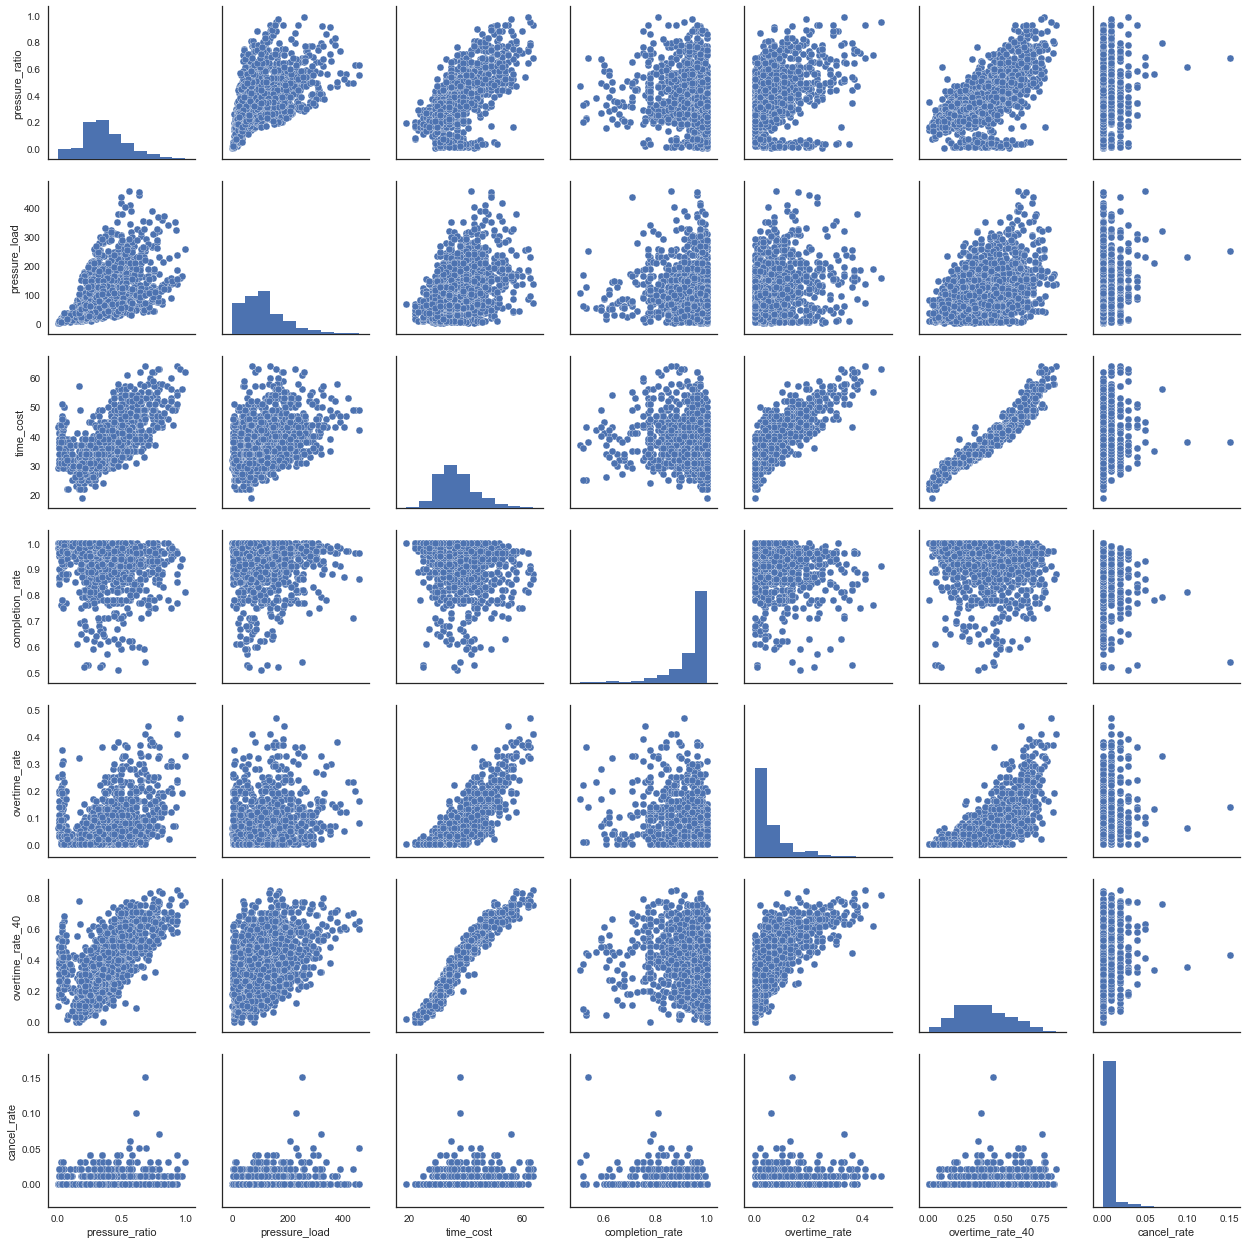

In [29]:
sns.pairplot(df5_zhengzhou[names1])

In [30]:
d = pd.DataFrame(data=df5_zhengzhou,columns=names1)
# Compute the correlation matrix
corr = d.corr()
corr

,pressure_ratio,pressure_load,time_cost,completion_rate,overtime_rate,overtime_rate_40,cancel_rate
pressure_ratio,1.000000,0.500740,0.653384,-0.147283,0.425059,0.657592,0.155904
pressure_load,0.500740,1.000000,0.385644,0.001940,0.250211,0.403335,0.190807
time_cost,0.653384,0.385644,1.000000,-0.207937,0.815887,0.961590,0.195232
completion_rate,-0.147283,0.001940,-0.207937,1.000000,-0.304313,-0.186248,-0.305176
overtime_rate,0.425059,0.250211,0.815887,-0.304313,1.000000,0.721344,0.243898
overtime_rate_40,0.657592,0.403335,0.961590,-0.186248,0.721344,1.000000,0.183462
cancel_rate,0.155904,0.190807,0.195232,-0.305176,0.243898,0.183462,1.000000


In [31]:
df5_beijing.shape

(7953, 10)

In [32]:
# create X and y
feature_cols = ['overtime_rate_40']
X = df5_beijing[feature_cols]
y = df5_beijing.pressure_ratio

In [33]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# print the coefficients
linreg.intercept_

0.16784716544795258

In [35]:
linreg.coef_

array([ 0.56585809])

In [36]:
X.quantile(.75)

overtime_rate_40    0.33
Name: 0.75, dtype: float64

In [37]:
(X.mean()+1.5*X.std()-linreg.intercept_)/linreg.coef_

overtime_rate_40    0.519003
dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
def f(X,feature_cols):    
    linreg=LinearRegression()
    linreg.fit(X[feature_cols],X.pressure_ratio)
    return (X[feature_cols].mean()+1.5*X[feature_cols].std()-linreg.intercept_)/linreg.coef_   

In [39]:
f(df5_beijing,['overtime_rate_40'])

overtime_rate_40    0.519003
dtype: float64

In [109]:
def df5_lm_std(x):
    pressure = pd.DataFrame(df5.ix[x.index].pressure_ratio)
    lm = LinearRegression().fit(pressure, x)    
    threshold = np.mean(x)+1.5*np.std(x)    
    return (threshold-lm.intercept_)/lm.coef_[0]
result=df5.groupby('city').agg({'overtime_rate_40': df5_lm_std,
                         'overtime_rate': df5_lm_std,
                         'cancel_rate': df5_lm_std,
                         'time_cost': df5_lm_std})
result

writer = pd.ExcelWriter('/Users/ymzhang/Desktop/result.xlsx', engine='xlsxwriter')
result.to_excel(writer, sheet_name='Sheet1')

In [41]:
def df5_lm_75perc(x):
    pressure = pd.DataFrame(df5.ix[x.index].pressure_ratio)
    lm = LinearRegression().fit(pressure, x)    
    threshold = x.quantile(.75)  
    return (threshold-lm.intercept_)/lm.coef_[0]
df5.groupby('city').agg({'overtime_rate_40': df5_lm_75perc,
                         'overtime_rate': df5_lm_75perc,
                         'cancel_rate': df5_lm_75perc,
                         'time_cost': df5_lm_75perc}) 

,overtime_rate_40,overtime_rate,cancel_rate,time_cost
city,,,,
三亚市,0.454449,0.414771,-0.342953,0.449124
东莞市,0.271981,0.200510,6.332205,0.325819
中山市,0.444917,0.321846,-1.086608,0.399888
临沂市,0.416486,0.422305,0.566904,0.392947
义乌市,0.338200,0.257651,0.007578,0.350512
九江市,0.418071,0.238461,0.662941,0.350785
佛山市,0.373665,0.299761,-0.071348,0.354685
兰州市,0.392193,0.269084,0.696636,0.333693
包头市,0.374405,0.056575,-1.885581,0.453629


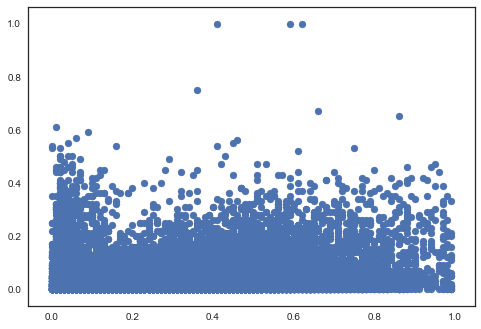

In [42]:
plt.scatter(df5['pressure_ratio'],df5['overtime_rate'])

In [43]:
writer = pd.ExcelWriter('/Users/ymzhang/Desktop/df5.xlsx', engine='xlsxwriter')
df5.to_excel(writer, sheet_name='Sheet1')

In [95]:
df5['pressure_ratio1']=round(df5.pressure_ratio,1)
df5_beijing['pressure_ratio1']=round(df5_beijing.pressure_ratio,1)

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
df5['pressure_ratio1'] = df5['pressure_ratio1'].astype('category')
df5_beijing['pressure_ratio1'] = df5_beijing['pressure_ratio1'].astype('category')

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
set(df5.pressure_ratio1)

{0.10000000000000001,
 0.20000000000000001,
 0.29999999999999999,
 0.40000000000000002,
 0.5,
 0.59999999999999998,
 0.69999999999999996,
 0.80000000000000004,
 0.90000000000000002,
 1.0,
 1.1000000000000001,
 1.2,
 1.3,
 1.3999999999999999}

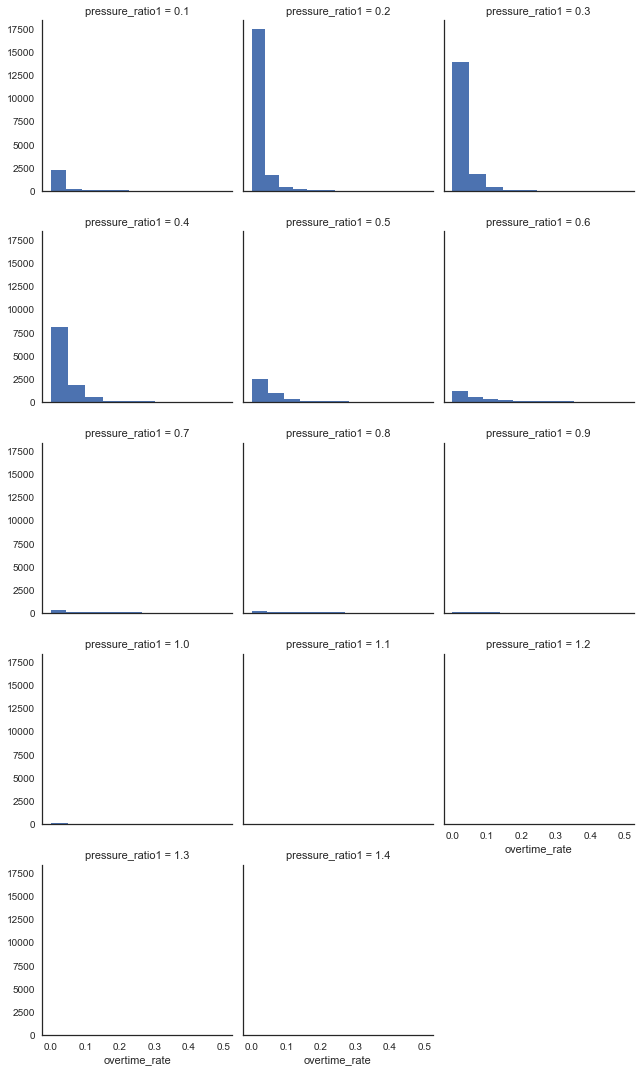

In [104]:
from __future__ import print_function, division
%matplotlib inline
grid=sns.FacetGrid(df5, col='pressure_ratio1', col_wrap=3, margin_titles=True)
grid.map(plt.hist, 'overtime_rate')
#grid.set(ylim=(0, 800))

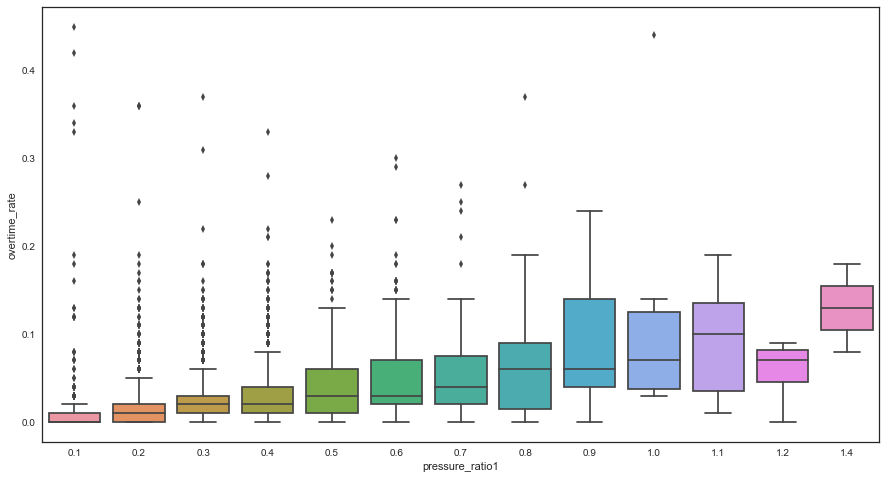

In [97]:
plt.subplots(figsize=(15,8))
sns.boxplot(x="pressure_ratio1", y='overtime_rate',data=df5_beijing)

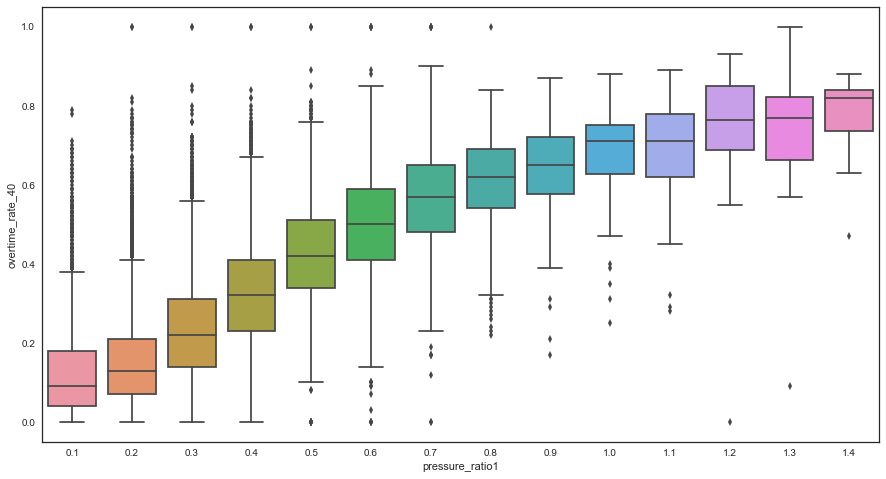

In [98]:
plt.subplots(figsize=(15,8))
sns.boxplot(x="pressure_ratio1", y='overtime_rate_40',data=df5)

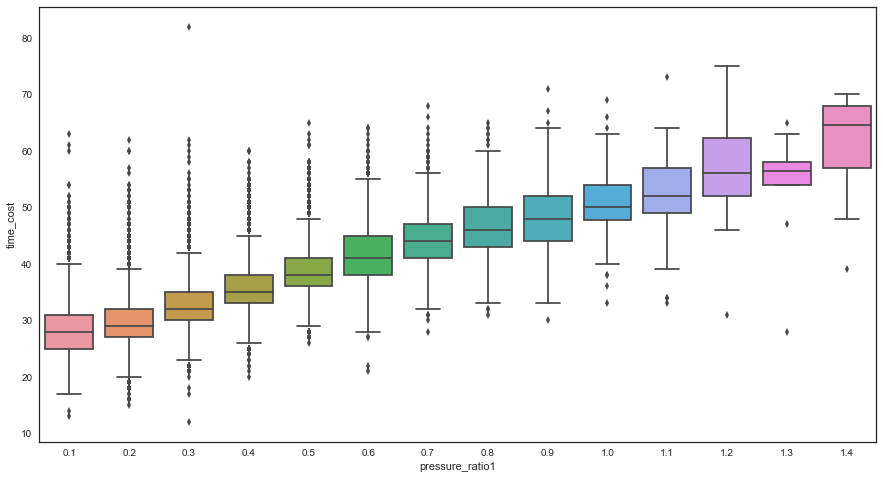

In [99]:
plt.subplots(figsize=(15,8))
sns.boxplot(x="pressure_ratio1", y='time_cost',data=df5)

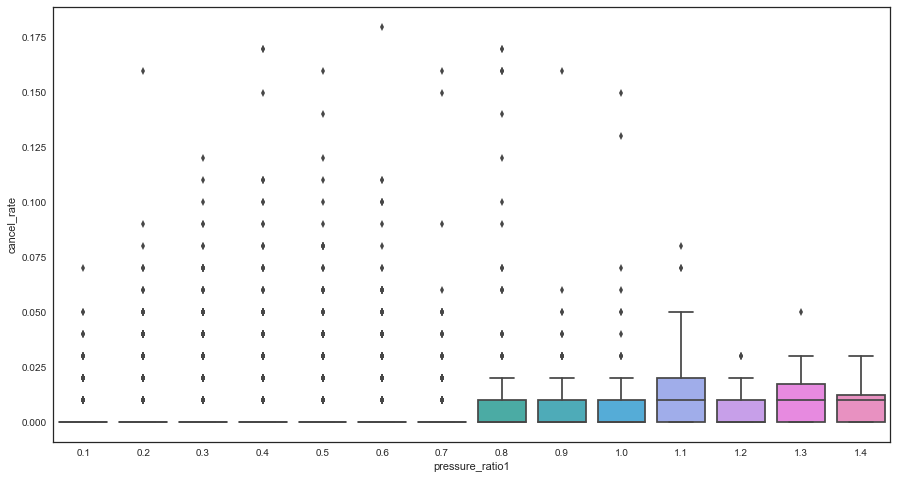

In [100]:
plt.subplots(figsize=(15,8))
sns.boxplot(x="pressure_ratio1", y='cancel_rate',data=df5)